In [1]:
import pandas as pd


/var/folders/rf/nt1q7t7j44vf7qskz3gdmjcr0000gn/T/ipykernel_88812/2035458946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import pandas as pd

df_apple_posts = pd.read_csv('apple_posts_year.csv')

selected_columns = ['author', 'created_utc', 'id', 'name', 'num_comments', 'score', 'selftext', 'title']
df_apple_posts = df_apple_posts[selected_columns]
df_apple_posts.head()


,author,created_utc,id,name,num_comments,score,selftext,title
0,[deleted],1672531299,10075cu,t3_10075cu,37,1,[deleted],Has anyone been having serious problems with S...
1,[deleted],1672531832,1007bjf,t3_1007bjf,0,1,[removed],Did Apple replace my battery with a wrong one?
2,pinkmen123,1672531847,1007bpo,t3_1007bpo,1,1,[removed],Price estimate!!
3,Juviltoidfu,1672532098,1007ekh,t3_1007ekh,1,1,[removed],What monitor to use as a second screen for my ...
4,[deleted],1672532126,1007eyl,t3_1007eyl,0,1,[removed],What should I do?


In [3]:
df_apple_com = pd.read_csv('apple_comments_year.csv')
selected_columns12 = ['id', 'author', 'body', 'created_utc', 'id', 'name', 'score']
df_apple_com = df_apple_com[selected_columns12]
df_apple_com

,id,author,body,created_utc,id,name,score
0,j2fxpr3,Tubamajuba,lol voluntarily viewing ads on a shittier app,1672531218,j2fxpr3,t1_j2fxpr3,16
1,j2fxtel,ToolUsingPrimate,The best alternative I've found so far is Vent...,1672531266,j2fxtel,t1_j2fxtel,1
2,j2fxvh6,gustafh,"But as humans, we deal in a lot bigger tempera...",1672531294,j2fxvh6,t1_j2fxvh6,11
3,j2fxyc7,jmnugent,That would definitely suck for older cars that...,1672531331,j2fxyc7,t1_j2fxyc7,18
4,j2fy3s3,Velcrocore,5S was the last phone I wanted to use without ...,1672531401,j2fy3s3,t1_j2fy3s3,1
...,...,...,...,...,...,...,...
2117417,kqb8o50,TrevorAlan,Laundry Care??? What? \n\n\nThe arrow is poin...,1707868655,kqb8o50,t1_kqb8o50,-10
2117418,kqb8pta,Gregoryxandrew,How is the input methods of the device… the si...,1707868673,kqb8pta,t1_kqb8pta,1
2117419,kqb8tp5,Alex11867,"On Android Spotify takes 10gb of cache alone, ...",1707868715,kqb8tp5,t1_kqb8tp5,1
2117420,kqb8tzb,Micazu999,16.5 sorry for the late response,1707868718,kqb8tzb,t1_kqb8tzb,1


## apple posts data cleaning

In [4]:
# Convert UNIX timestamp to normal human readable timestamp
# Filter out rows where 'Created_utc' is None
df_apple_posts = df_apple_posts[df_apple_posts['created_utc'].notna()]

# Convert UNIX timestamp to human-readable format
df_apple_posts['created_utc'] = pd.to_datetime(df_apple_posts['created_utc'], unit='s')

df_apple_posts.head()

,author,created_utc,id,name,num_comments,score,selftext,title
0,[deleted],2023-01-01 00:01:39,10075cu,t3_10075cu,37,1,[deleted],Has anyone been having serious problems with S...
1,[deleted],2023-01-01 00:10:32,1007bjf,t3_1007bjf,0,1,[removed],Did Apple replace my battery with a wrong one?
2,pinkmen123,2023-01-01 00:10:47,1007bpo,t3_1007bpo,1,1,[removed],Price estimate!!
3,Juviltoidfu,2023-01-01 00:14:58,1007ekh,t3_1007ekh,1,1,[removed],What monitor to use as a second screen for my ...
4,[deleted],2023-01-01 00:15:26,1007eyl,t3_1007eyl,0,1,[removed],What should I do?


In [5]:
df_apple_posts['selftext']= df_apple_posts['selftext'].astype(str)
df_apple_posts['cleaned_selftext'] = df_apple_posts['selftext'].astype(str).replace(['[removed]', '[deleted]','nan'], '')
df_apple_posts.head(25)

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext
0,[deleted],2023-01-01 00:01:39,10075cu,t3_10075cu,37,1,[deleted],Has anyone been having serious problems with S...,
1,[deleted],2023-01-01 00:10:32,1007bjf,t3_1007bjf,0,1,[removed],Did Apple replace my battery with a wrong one?,
2,pinkmen123,2023-01-01 00:10:47,1007bpo,t3_1007bpo,1,1,[removed],Price estimate!!,
3,Juviltoidfu,2023-01-01 00:14:58,1007ekh,t3_1007ekh,1,1,[removed],What monitor to use as a second screen for my ...,
4,[deleted],2023-01-01 00:15:26,1007eyl,t3_1007eyl,0,1,[removed],What should I do?,
5,DofTwo,2023-01-01 00:17:19,1007g99,t3_1007g99,1,1,[removed],"Transferring information to new MacBook, howev...",
6,Hamza_elk,2023-01-01 00:18:18,1007gxh,t3_1007gxh,1,1,[removed],What should I do,
7,pgfoundali,2023-01-01 01:13:18,1008ha8,t3_1008ha8,1,1,[removed],Thinking about picking up a used Thunderbolt D...,
8,CelebrationGloomy,2023-01-01 01:37:33,1008x30,t3_1008x30,1,1,nan,Clips that made Emmanuel Shadow Famous!,
9,SackOfRadishes,2023-01-01 01:41:48,1008zu1,t3_1008zu1,1,1,[removed],MagSafe Case Animation?,


In [6]:
df_apple_posts['title_merged'] = df_apple_posts['cleaned_selftext'].astype(str) + ' ' + df_apple_posts['title'].astype(str)
df_apple_posts.head()

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext,title_merged
0,[deleted],2023-01-01 00:01:39,10075cu,t3_10075cu,37,1,[deleted],Has anyone been having serious problems with S...,,Has anyone been having serious problems with ...
1,[deleted],2023-01-01 00:10:32,1007bjf,t3_1007bjf,0,1,[removed],Did Apple replace my battery with a wrong one?,,Did Apple replace my battery with a wrong one?
2,pinkmen123,2023-01-01 00:10:47,1007bpo,t3_1007bpo,1,1,[removed],Price estimate!!,,Price estimate!!
3,Juviltoidfu,2023-01-01 00:14:58,1007ekh,t3_1007ekh,1,1,[removed],What monitor to use as a second screen for my ...,,What monitor to use as a second screen for my...
4,[deleted],2023-01-01 00:15:26,1007eyl,t3_1007eyl,0,1,[removed],What should I do?,,What should I do?


In [7]:
import re
import string
import pandas as pd

def clean_text(text):
    # Check if the value is NaN
    if pd.isna(text):
        return ''

    # Convert to lowercase
    text = text.lower()

    # Remove text within brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('utf-8')

    # Remove additional parentheses
    text = re.sub(r'\(+\)', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove newline characters and extra whitespaces
    text = re.sub(r'\s+', ' ', text.replace('\n', ' ').strip())

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove hashtags (words starting with '#')
    text = re.sub(r'#\w+', '', text)

    # Remove mentions (words starting with '@')
    text = re.sub(r'@\w+', '', text)

    return text


In [8]:
# Apply the clean_text function to the 'selftext' column
df_apple_posts['title_cleaned'] = df_apple_posts['title_merged'].apply(clean_text)
df_apple_posts.head(5)

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext,title_merged,title_cleaned
0,[deleted],2023-01-01 00:01:39,10075cu,t3_10075cu,37,1,[deleted],Has anyone been having serious problems with S...,,Has anyone been having serious problems with ...,has anyone been having serious problems with s...
1,[deleted],2023-01-01 00:10:32,1007bjf,t3_1007bjf,0,1,[removed],Did Apple replace my battery with a wrong one?,,Did Apple replace my battery with a wrong one?,did apple replace my battery with a wrong one
2,pinkmen123,2023-01-01 00:10:47,1007bpo,t3_1007bpo,1,1,[removed],Price estimate!!,,Price estimate!!,price estimate
3,Juviltoidfu,2023-01-01 00:14:58,1007ekh,t3_1007ekh,1,1,[removed],What monitor to use as a second screen for my ...,,What monitor to use as a second screen for my...,what monitor to use as a second screen for my ...
4,[deleted],2023-01-01 00:15:26,1007eyl,t3_1007eyl,0,1,[removed],What should I do?,,What should I do?,what should i do


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation and lowercasing
    tokens = [token.lower() for token in tokens if token.isalpha()]

    # Removing stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Joining tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [10]:
# Assuming df_apple_posts is your DataFrame
df_apple_posts.dropna(subset=['title'], inplace=True)

In [11]:
df_apple_posts['fully_cleaned_title'] = df_apple_posts['title'].apply(preprocess_text)
df_apple_posts.head(5)

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext,title_merged,title_cleaned,fully_cleaned_title
0,[deleted],2023-01-01 00:01:39,10075cu,t3_10075cu,37,1,[deleted],Has anyone been having serious problems with S...,,Has anyone been having serious problems with ...,has anyone been having serious problems with s...,anyone serious problem safari
1,[deleted],2023-01-01 00:10:32,1007bjf,t3_1007bjf,0,1,[removed],Did Apple replace my battery with a wrong one?,,Did Apple replace my battery with a wrong one?,did apple replace my battery with a wrong one,apple replace battery wrong one
2,pinkmen123,2023-01-01 00:10:47,1007bpo,t3_1007bpo,1,1,[removed],Price estimate!!,,Price estimate!!,price estimate,price estimate
3,Juviltoidfu,2023-01-01 00:14:58,1007ekh,t3_1007ekh,1,1,[removed],What monitor to use as a second screen for my ...,,What monitor to use as a second screen for my...,what monitor to use as a second screen for my ...,monitor use second screen studio max
4,[deleted],2023-01-01 00:15:26,1007eyl,t3_1007eyl,0,1,[removed],What should I do?,,What should I do?,what should i do,


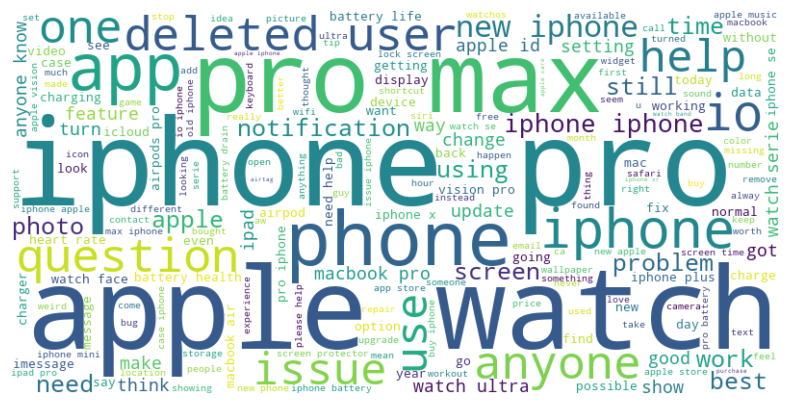

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all titles into a single string
text = ' '.join(df_apple_posts['fully_cleaned_title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## apple comments data cleaning

In [13]:
# Convert 'created_utc' column to numeric type
df_apple_com['created_utc'] = pd.to_numeric(df_apple_com['created_utc'], errors='coerce')

# Convert UNIX timestamp to human-readable format
df_apple_com['created_utc'] = pd.to_datetime(df_apple_com['created_utc'], unit='s')

df_apple_com.head()

,id,author,body,created_utc,id,name,score
0,j2fxpr3,Tubamajuba,lol voluntarily viewing ads on a shittier app,2023-01-01 00:00:18,j2fxpr3,t1_j2fxpr3,16
1,j2fxtel,ToolUsingPrimate,The best alternative I've found so far is Vent...,2023-01-01 00:01:06,j2fxtel,t1_j2fxtel,1
2,j2fxvh6,gustafh,"But as humans, we deal in a lot bigger tempera...",2023-01-01 00:01:34,j2fxvh6,t1_j2fxvh6,11
3,j2fxyc7,jmnugent,That would definitely suck for older cars that...,2023-01-01 00:02:11,j2fxyc7,t1_j2fxyc7,18
4,j2fy3s3,Velcrocore,5S was the last phone I wanted to use without ...,2023-01-01 00:03:21,j2fy3s3,t1_j2fy3s3,1


In [14]:
# Apply the clean_text function to the 'selftext' column
df_apple_com['body_cleaned'] = df_apple_com['body'].apply(clean_text)
df_apple_com['fully_cleaned_body'] = df_apple_com['body_cleaned'].apply(preprocess_text)
df_apple_com.head()

,id,author,body,created_utc,id,name,score,body_cleaned,fully_cleaned_body
0,j2fxpr3,Tubamajuba,lol voluntarily viewing ads on a shittier app,2023-01-01 00:00:18,j2fxpr3,t1_j2fxpr3,16,lol voluntarily viewing ads on a shittier app,lol voluntarily viewing ad shittier app
1,j2fxtel,ToolUsingPrimate,The best alternative I've found so far is Vent...,2023-01-01 00:01:06,j2fxtel,t1_j2fxtel,1,the best alternative ive found so far is ventu...,best alternative ive found far ventusky defici...
2,j2fxvh6,gustafh,"But as humans, we deal in a lot bigger tempera...",2023-01-01 00:01:34,j2fxvh6,t1_j2fxvh6,11,but as humans we deal in a lot bigger temperat...,human deal lot bigger temperature span least f...
3,j2fxyc7,jmnugent,That would definitely suck for older cars that...,2023-01-01 00:02:11,j2fxyc7,t1_j2fxyc7,18,that would definitely suck for older cars that...,would definitely suck older car cant wireless ...
4,j2fy3s3,Velcrocore,5S was the last phone I wanted to use without ...,2023-01-01 00:03:21,j2fy3s3,t1_j2fy3s3,1,5s was the last phone i wanted to use without ...,last phone wanted use without case


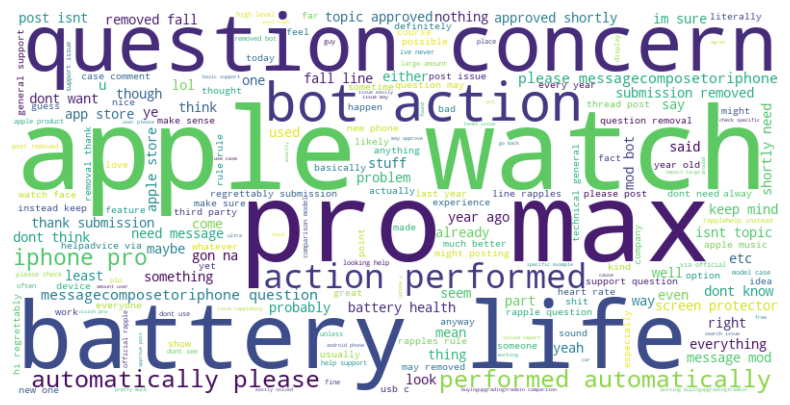

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all titles into a single string
text = ' '.join(df_apple_com['fully_cleaned_body'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
df_apple_posts.rename(columns={'title_cleaned':'text'},inplace=True)
df_apple_com.rename(columns={'body_cleaned':'text'},inplace=True)

In [17]:
sentiments = pd.concat([df_apple_posts[['created_utc', 'text']], df_apple_com[['created_utc', 'text']]], axis=0)

## Sentimental analysis

In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [19]:
# Function to classify sentiment as positive, negative, or neutral
def get_sentiment_label(text):
    sentiment_scores = analyzer.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    if sentiment_score >= 0.05:
        sentiment_label = 'Positive'
    elif sentiment_score <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    return sentiment_score, sentiment_label


In [20]:
# Apply sentiment analysis to each row of 'selftext_cleaned' and 'title_cleaned' columns
sentiments[['score', 'label']] = sentiments.apply(lambda row: pd.Series(get_sentiment_label(row['text'])), axis=1)

In [21]:
sentiments

,created_utc,text,score,label
0,2023-01-01 00:01:39,has anyone been having serious problems with s...,-0.4588,Negative
1,2023-01-01 00:10:32,did apple replace my battery with a wrong one,-0.4767,Negative
2,2023-01-01 00:10:47,price estimate,0.0000,Neutral
3,2023-01-01 00:14:58,what monitor to use as a second screen for my ...,0.0000,Neutral
4,2023-01-01 00:15:26,what should i do,0.0000,Neutral
...,...,...,...,...
2117417,2024-02-13 23:57:35,laundry care what the arrow is pointing at vis...,0.4939,Positive
2117418,2024-02-13 23:57:53,how is the input methods of the device the sin...,0.2716,Positive
2117419,2024-02-13 23:58:35,on android spotify takes 10gb of cache alone n...,-0.2500,Negative
2117420,2024-02-13 23:58:38,165 sorry for the late response,-0.0772,Negative


In [22]:
sentiments.label.value_counts()

label
Positive    1009852
Neutral      785208
Negative     496399
Name: count, dtype: int64

In [23]:
import datetime
sentiments['date']=sentiments['created_utc'].dt.date
sentiments.head()

,created_utc,text,score,label,date
0,2023-01-01 00:01:39,has anyone been having serious problems with s...,-0.4588,Negative,2023-01-01
1,2023-01-01 00:10:32,did apple replace my battery with a wrong one,-0.4767,Negative,2023-01-01
2,2023-01-01 00:10:47,price estimate,0.0000,Neutral,2023-01-01
3,2023-01-01 00:14:58,what monitor to use as a second screen for my ...,0.0000,Neutral,2023-01-01
4,2023-01-01 00:15:26,what should i do,0.0000,Neutral,2023-01-01


In [24]:
sentiments.to_csv('sentiments_apple.csv', index=False)

In [25]:
# Separate DataFrames for each sentiment type
negative_sentiments = sentiments[sentiments['label'] == 'Negative']
positive_sentiments = sentiments[sentiments['label'] == 'Positive']
neutral_sentiments = sentiments[sentiments['label'] == 'Neutral']

# Calculate mean score and count for each sentiment type for every day
df_negative = negative_sentiments.groupby(["date"]).agg({'score': 'mean', 'label': 'count'}).reset_index().rename(columns={'label': 'count_negative','score': 'mean_negative'})
df_positive = positive_sentiments.groupby(["date"]).agg({'score': 'mean', 'label': 'count'}).reset_index().rename(columns={'label': 'count_positive','score': 'mean_positive'})
df_neutral = neutral_sentiments.groupby(["date"]).agg({'score': 'mean', 'label': 'count'}).reset_index().rename(columns={'label': 'count_neutral','score': 'mean_neutral'})

# Merge the DataFrames
df_apple = pd.merge(df_negative, df_positive, on="date", how="outer")
df_apple = pd.merge(df_apple, df_neutral, on="date", how="outer")

# Compute overall mean score of the day
df_apple['overall_mean_score'] = (df_apple['mean_negative'] * df_apple['count_negative'] + df_apple['mean_positive'] * df_apple['count_positive'] + df_apple['mean_neutral'] * df_apple['count_neutral']) / (df_apple['count_negative'] + df_apple['count_positive'] + df_apple['count_neutral'])

# Fill NaN values with 0
df_apple.fillna(0, inplace=True)

# Display the DataFrame
print(df_apple.head())


         date  mean_negative  count_negative  mean_positive  count_positive  \
0  2023-01-01      -0.436521           839.0       0.534094            1704   
1  2023-01-02      -0.448957           965.0       0.525137            1976   
2  2023-01-03      -0.434494          1053.0       0.511804            2190   
3  2023-01-04      -0.427496          1094.0       0.514950            2202   
4  2023-01-05      -0.431579          1185.0       0.531695            2732   

   mean_neutral  count_neutral  overall_mean_score  
0     -0.000016           1344            0.139911  
1      0.000256           1500            0.136188  
2      0.000171           1647            0.135708  
3      0.000297           1666            0.134368  
4      0.000036           1827            0.163864  


## Yfinance

In [26]:
!pip install yfinance

In [27]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = "NVDA"

# Define the date range
start_date = "2023-01-01"
end_date = "2024-02-14"

# Fetch the historical data
apple_stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Convert the fetched data to a DataFrame
df_apple_stock = pd.DataFrame(apple_stock_data)

# Display the DataFrame
df_apple_stock.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079803,40127700
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417694,43132400
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580032,38916800
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203354,50423100


In [28]:
apple_stock_data= apple_stock_data.reset_index(inplace=False)
apple_stock_data.rename(columns={'Date':'date'},inplace=True)
apple_stock_data.head(5)

,date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079803,40127700
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417694,43132400
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580032,38916800
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203354,50423100


In [29]:
apple_stock_data['date'] = pd.to_datetime(apple_stock_data['date']).dt.date

In [30]:
df_apple_final = pd.merge(apple_stock_data, df_apple, on='date', how='inner')
df_apple_final['mean_negative'] = df_apple_final['mean_negative'].abs()
df_apple_final['mean_neutral'] = df_apple_final['mean_neutral'].abs()

In [31]:
# Shift 'Open' column by one row to get the next day's open
next_day_open = df_apple_final['Open'].shift(-1)

# Add the next day's open as a new column
df_apple_final['Next Day Open'] = next_day_open
df_apple_final.dropna(inplace=True)
df_apple_final.head(5)

,date,Open,High,Low,Close,Adj Close,Volume,mean_negative,count_negative,mean_positive,count_positive,mean_neutral,count_neutral,overall_mean_score,Next Day Open
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079803,40127700,0.434494,1053.0,0.511804,2190,0.000171,1647,0.135708,145.669998
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417694,43132400,0.427496,1094.0,0.514950,2202,0.000297,1666,0.134368,144.910004
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580032,38916800,0.431579,1185.0,0.531695,2732,0.000036,1827,0.163864,144.740005
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400,0.429003,1011.0,0.520455,2042,0.000072,1606,0.135043,152.839996
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203354,50423100,0.424657,1147.0,0.528409,2554,0.000313,1835,0.155898,155.070007


In [32]:
df_apple_final.head(5)

,date,Open,High,Low,Close,Adj Close,Volume,mean_negative,count_negative,mean_positive,count_positive,mean_neutral,count_neutral,overall_mean_score,Next Day Open
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079803,40127700,0.434494,1053.0,0.511804,2190,0.000171,1647,0.135708,145.669998
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417694,43132400,0.427496,1094.0,0.514950,2202,0.000297,1666,0.134368,144.910004
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580032,38916800,0.431579,1185.0,0.531695,2732,0.000036,1827,0.163864,144.740005
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400,0.429003,1011.0,0.520455,2042,0.000072,1606,0.135043,152.839996
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203354,50423100,0.424657,1147.0,0.528409,2554,0.000313,1835,0.155898,155.070007


In [33]:
# df_apple_final.corr()

In [34]:
df_apple_final.columns

Index(['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'mean_negative', 'count_negative', 'mean_positive', 'count_positive',
       'mean_neutral', 'count_neutral', 'overall_mean_score', 'Next Day Open'],
      dtype='object')

In [35]:
df_apple_final.to_csv('df_apple_final_year.csv', index=False)